In [24]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [25]:
# File paths
employees_load = Path("EmployeeSQL/Resources/employees.csv")
departments_load = Path("EmployeeSQL/Resources/departments.csv")
dept_emp_load = Path("EmployeeSQL/Resources/dept_emp.csv")
salaries_load = Path("EmployeeSQL/Resources/salaries.csv")

# Read Data Files and store into Pandas DataFrames
employees_data = pd.read_csv(employees_load)
departments_data = pd.read_csv(departments_load)
departments_employees_data = pd.read_csv(dept_emp_load)
salaries_data = pd.read_csv(salaries_load)


In [26]:
# Merge employees with department employees on employees number
merged_data_1 = pd.merge(employees_data, departments_employees_data, on='emp_no', how='inner')
merged_data_1.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,dept_no
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,d002
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,d004
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,d004
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,d003
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,d006


In [27]:
# Merge previus data with departments data on department number
merged_data_2 = pd.merge(merged_data_1, departments_data, on='dept_no', how='inner')
merged_data_2.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,dept_no,dept_name
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,d002,Finance
1,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,d002,Finance
2,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,d002,Finance
3,424270,s0001,1/15/1963,Kellyn,Yoshizawa,F,5/8/1995,d002,Finance
4,37473,s0001,3/6/1952,Prasadram,Valette,M,2/16/1994,d002,Finance


In [29]:
# Merge merged_data_2  with salaries data on employees number
employees_df = pd.merge(merged_data_2, salaries_data, on='emp_no', how='inner')
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,dept_no,dept_name,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,d002,Finance,40000
1,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,d002,Finance,40000
2,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,d002,Finance,63016
3,424270,s0001,1/15/1963,Kellyn,Yoshizawa,F,5/8/1995,d002,Finance,60678
4,424270,s0001,1/15/1963,Kellyn,Yoshizawa,F,5/8/1995,d007,Sales,60678


In [31]:
# Checking the number of employees
employees_count = employees_df["emp_no"].nunique()
employees_count

300024

In [34]:
# Calculate employees per Department
employees_per_department = employees_df["dept_name"].value_counts()
employees_per_department

Development           85707
Production            73485
Sales                 52245
Customer Service      23580
Research              21126
Marketing             20211
Quality Management    20117
Human Resources       17786
Finance               17346
Name: dept_name, dtype: int64

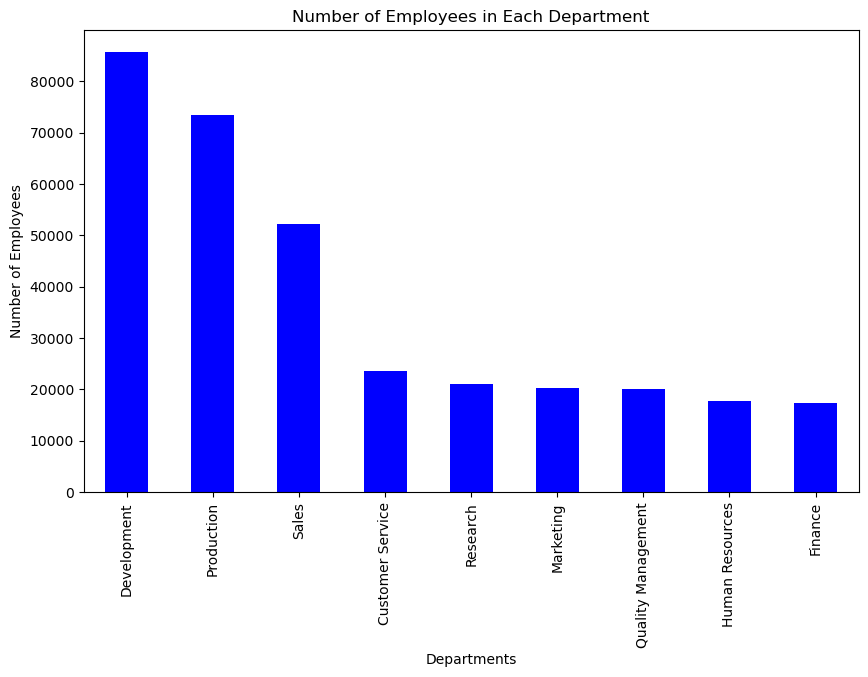

In [38]:
# Generate a bar plot showing the total number of employees for each department.

employees_per_department.plot(kind='bar', color='blue', figsize=(10, 6))

plt.title ("Number of Employees in Each Department")
plt.xlabel("Departments")
plt.ylabel("Number of Employees")


plt.savefig("EmployeeSQL/Resources/fig1.png",bbox_inches='tight')
plt.show()

In [45]:
# Calculate the total department budget
per_department_budget = employees_df.groupby("dept_name")["salary"].sum()
per_department_budget

dept_name
Customer Service      1131808649
Development           4173702462
Finance               1032668378
Human Resources        794654412
Marketing             1234809182
Production            3583161729
Quality Management     934555467
Research              1032009108
Sales                 3648379483
Name: salary, dtype: int64

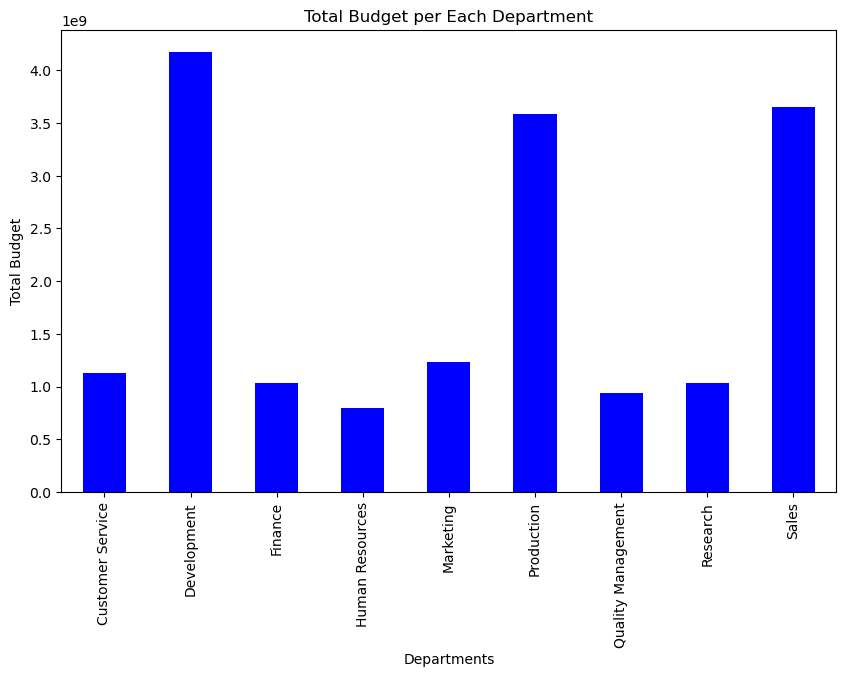

In [46]:
# Generate a bar plot showing the total budget per each department.

per_department_budget.plot(kind='bar', color='blue', figsize=(10, 6))

plt.title ("Total Budget per Each Department")
plt.xlabel("Departments")
plt.ylabel("Total Budget")


plt.savefig("EmployeeSQL/Resources/fig2.png",bbox_inches='tight')
plt.show()

In [48]:
employees_gender_data = employees_df["sex"].value_counts()
employees_gender_data

M    198850
F    132753
Name: sex, dtype: int64

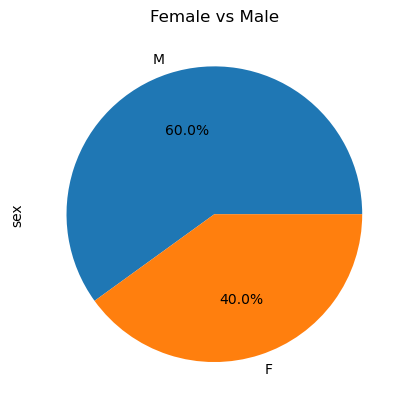

In [49]:
# Generate a pie plot showing the distribution of female versus male.
employees_gender_data.plot.pie(autopct="%1.1f%%")
plt.title ("Female vs Male")
plt.savefig("EmployeeSQL/Resources/fig3.png",bbox_inches='tight')
plt.show()